In [15]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df=pd.read_csv(r"C:\Users\garim\Downloads\framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [19]:
df.drop(columns=['education'],inplace=True,axis=1)
df.dropna(axis=0,inplace=True)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
print(df['TenYearCHD'].value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [24]:
X=np.asarray(df[['male','age','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(df['TenYearCHD'])

X=preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

print('Train test: ',X_train.shape,y_train.shape)
print('Test Size:',X_test.shape,y_test.shape)

Train test:  (2625, 6) (2625,)
Test Size: (1126, 6) (1126,)


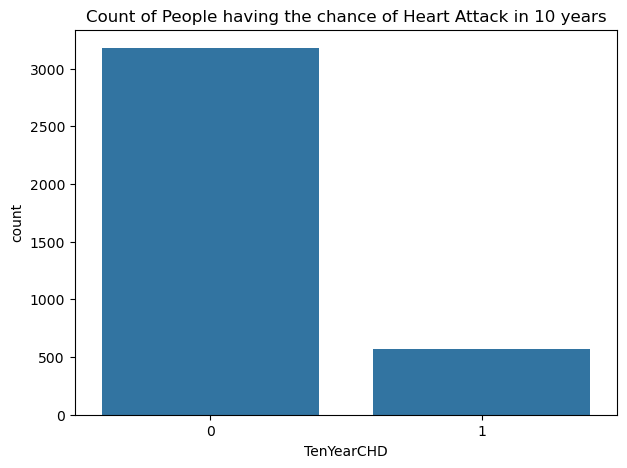

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD',data=df)
plt.title('Count of People having the chance of Heart Attack in 10 years')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)



In [36]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy of the model is: ',accuracy)

Accuracy of the model is:  0.8490230905861457


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print('Details of the confusion matrix is: ')
print(classification_report(y_test,y_pred))



Details of the confusion matrix is: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



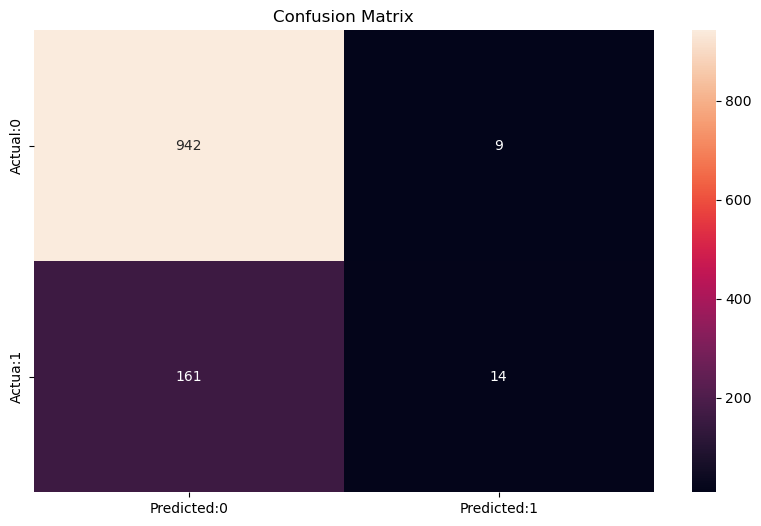

In [44]:
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,
                    columns=['Predicted:0','Predicted:1'],
                    index=['Actual:0','Actua:1'])
plt.figure(figsize=(10,6))
sns.heatmap(matrix,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [58]:
input_data=(0,44,0,140,90,70)
input_data=np.asarray(input_data)
input_data=input_data.reshape(1,-1)
input_data=preprocessing.StandardScaler().fit(input_data).transform(input_data)

prediction=model.predict(input_data)
if(prediction==1):
    print('The person has propbability of heart disease')
else:
    print('The person does not have the propbability of heart disease')

The person does not have the propbability of heart disease


In [62]:
model.predict_proba(input_data)
 

array([[0.88125148, 0.11874852]])